# Titanic

# 1. Importing libraries

In [389]:
# For data manipulation
import numpy as np
import pandas as pd 

# For Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# 2. Loading Data

In [390]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [391]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [392]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Data Preprocessing

In [393]:
print('Tarining Data Info:')
print(train_df.info())
print("-------------------------")
print('Test Data Info:')
print(test_df.info())

Tarining Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-------------------------
Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

#### There are in training data :
- 177 null Age 
- 2 NaNs in Embmarks
- 687 NaNs in Cabin

#### There are in test data :
- 86 null Age 
- 1 NaNs in Fare
- 317 NaNs in Cabin

## Replace missing age with the median value per class for each sex

In [394]:
# Get median ages for training data
median_ages_train = train_df.groupby(['Sex','Pclass'])['Age'].median()
median_ages_train

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [395]:
# Get median ages for test data
median_ages_test = test_df.groupby(['Sex','Pclass'])['Age'].median()
median_ages_test

Sex     Pclass
female  1         41.0
        2         24.0
        3         22.0
male    1         42.0
        2         28.0
        3         24.0
Name: Age, dtype: float64

In [396]:
# This Function to replace missing values in 'Age' according to Sex and Class
def replace_train_age(row):
    if pd.isnull(row['Age']):
        return median_ages_train[row['Sex'], row['Pclass']]
    return row['Age']

def replace_test_age(row):
    if pd.isnull(row['Age']):
        return median_ages_test[row['Sex'], row['Pclass']]
    return row['Age']

In [397]:
train_df['Age'] = train_df.apply(replace_train_age, axis=1)
test_df['Age'] = test_df.apply(replace_test_age, axis=1)

## Replace Embarked with most occured value

In [398]:
train_df.groupby(['Sex','Pclass','Embarked'])['Age'].count()

Sex     Pclass  Embarked
female  1       C            43
                Q             1
                S            48
        2       C             7
                Q             2
                S            67
        3       C            23
                Q            33
                S            88
male    1       C            42
                Q             1
                S            79
        2       C            10
                Q             1
                S            97
        3       C            43
                Q            39
                S           265
Name: Age, dtype: int64

In [399]:
train_df[ pd.isnull(train_df['Embarked']) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The two missing values is female and from 1 class so we will replace it with 'S'

In [400]:
train_df['Embarked'].fillna('S', inplace = True)

## Replace Missing value in `Fare` Col in Test Data

In [401]:
test_df[ pd.isnull(test_df['Fare']) ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [402]:
mean_val = test_df[ (test_df['Sex'] == 'male') ]['Fare'].mean()
test_df['Fare'].fillna(mean_val, inplace = True)

## Drop `Cabin` Column

In [403]:
train_df.drop('Cabin', axis = 1, inplace = True)
test_df.drop('Cabin', axis = 1, inplace = True)

In [404]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [405]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## Data now ready for Analysis & Visualization

# 4. Analysis and Visualization  

In [406]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [407]:
# function to get details about survive or not for col 
def get_survived_details(col):
    survived_or_not = train_df.groupby([col, 'Survived'])['Survived'].count().unstack()
    total = pd.DataFrame(survived_or_not.sum(axis=1))
    survive_percentage = pd.DataFrame(survived_or_not[1] / total[0] * 100)
    survived = pd.merge( pd.merge(survived_or_not, total, on=col), survive_percentage, on=col).fillna(0)
    survived.columns = ['Not Survived', 'Survived', 'Total', 'Survive Percentage']
    return survived

## How many passengers survived?

In [408]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

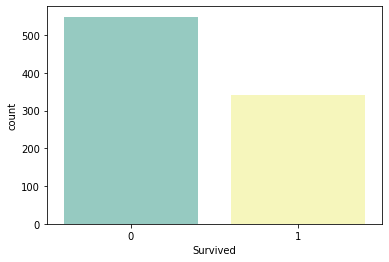

In [409]:
sns.countplot(x = 'Survived', data = train_df, palette='Set3')

## Impact of the passenger Class

number of passenger per class

In [410]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

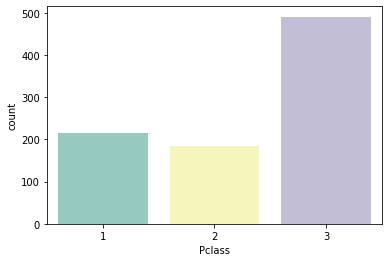

In [411]:
sns.countplot(x = 'Pclass', data = train_df, palette='Set3')

How many passenger survived for each class?

In [412]:
class_info = get_survived_details('Pclass')
class_info

,Not Survived,Survived,Total,Survive Percentage
Pclass,,,,
1,80,136,216,62.962963
2,97,87,184,47.282609
3,372,119,491,24.236253


<AxesSubplot:xlabel='Pclass', ylabel='count'>

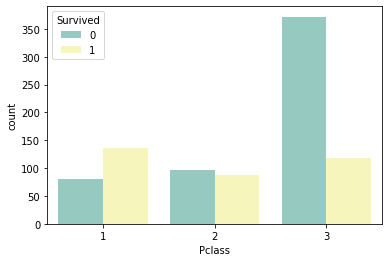

In [413]:
sns.countplot(x='Pclass', data=train_df, hue='Survived', palette='Set3')

- About 63% survived from the 1st class
- Anout 24% only survived from the 3rd class

It's now clear that the passenger class affects his life rate, A large number of passengers were travelling in 3rd class (491), but only 24.24% survived.

It can be concluded that
- 1st class were given preference in rescue operations

## Impact of the passenger Gender

number of passenger for each gender

In [414]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

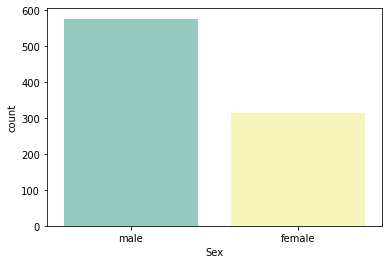

In [415]:
sns.countplot(x='Sex', data=train_df, palette='Set3')

How many passenger survived for each Gender?

In [416]:
gender_info = get_survived_details('Sex')
gender_info

,Not Survived,Survived,Total,Survive Percentage
Sex,,,,
female,81,233,314,74.203822
male,468,109,577,18.890815


<AxesSubplot:xlabel='Sex', ylabel='count'>

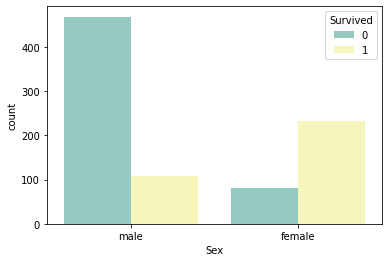

In [417]:
sns.countplot(x='Sex', data=train_df, hue='Survived', palette='Set3')

We see that Females have very high rate of survival
- Females survival percentage 74.2%
- Males survival percentage about 19% only

It can be concluded that
- females were given preference in rescue operations
- males have sacrificed themselves to let the females survive.

## Impact of the passenger Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

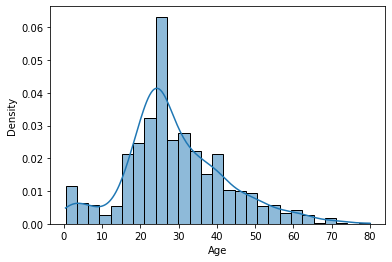

In [418]:
sns.histplot(train_df['Age'], kde=True, stat="density")

I will split `Age` into 5 categories ['Childs', 'teenagers', 'adults', 'mans', 'olds']

In [419]:
train_df.loc[ train_df['Age'] <= 16, 'Age_group' ] = 'child'
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 26) , 'Age_group' ] = 'teenager'
train_df.loc[(train_df['Age'] > 26) & (train_df['Age'] <= 36) , 'Age_group' ] = 'Adult'
train_df.loc[(train_df['Age'] > 36) & (train_df['Age'] <= 62) , 'Age_group' ] = 'Man'
train_df.loc[ train_df['Age'] > 62, 'Age_group' ] = 'Old'
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,teenager
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Man
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,teenager
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


Number of survival per each Age Category

In [420]:
train_df['Age_group'].value_counts()

teenager    355
Adult       220
Man         201
child       100
Old          15
Name: Age_group, dtype: int64

<AxesSubplot:xlabel='Age_group', ylabel='count'>

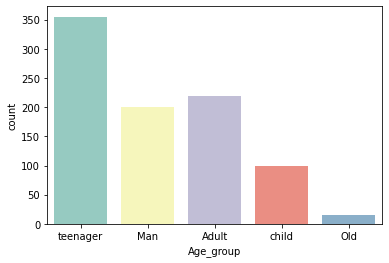

In [421]:
sns.countplot(x='Age_group', data=train_df, palette='Set3')

In [422]:
age_info =  get_survived_details('Age_group')
age_info

,Not Survived,Survived,Total,Survive Percentage
Age_group,,,,
Adult,119,101,220,45.909091
Man,127,74,201,36.815920
Old,12,3,15,20.000000
child,45,55,100,55.000000
teenager,246,109,355,30.704225


<AxesSubplot:xlabel='Age_group', ylabel='count'>

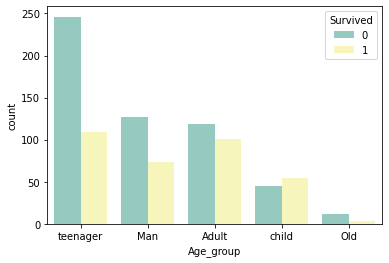

In [423]:
sns.countplot(x='Age_group', data=train_df, hue='Survived', palette='Set3')

We see that childs have the highest survival rate and olds have the lowest survival rate, just 3 from 12 who were over 62 years old survived.
- childe survival rate 55%
- olds survival rate 20% only

## Impact of Number of companions

In [424]:
train_df['companions'] = train_df['SibSp'] + train_df['Parch']
train_df['companions'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: companions, dtype: int64

<AxesSubplot:xlabel='companions', ylabel='count'>

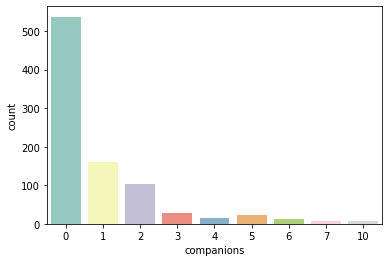

In [425]:
sns.countplot(x='companions', data=train_df, palette='Set3')

In [426]:
sib_info =  get_survived_details('companions')
sib_info

,Not Survived,Survived,Total,Survive Percentage
companions,,,,
0,374.0,163.0,537.0,30.353818
1,72.0,89.0,161.0,55.279503
2,43.0,59.0,102.0,57.843137
3,8.0,21.0,29.0,72.413793
4,12.0,3.0,15.0,20.000000
5,19.0,3.0,22.0,13.636364
6,8.0,4.0,12.0,33.333333
7,6.0,0.0,6.0,0.000000
10,7.0,0.0,7.0,0.000000


<AxesSubplot:xlabel='companions', ylabel='count'>

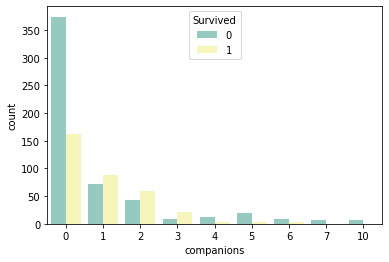

In [427]:
sns.countplot(x='companions', data=train_df, hue='Survived', palette='Set3')

We see that most of passenger were alone but about 30% only survived
- 608 were alone just 163 survived (30%)

the passenger had one, two, or three companions have a high survival rate

## Impact of Passenger Fare

In [428]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

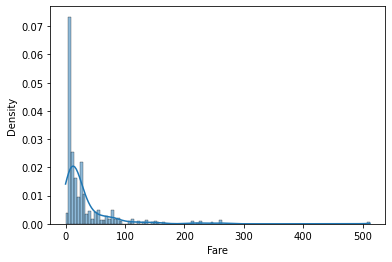

In [429]:
sns.histplot(train_df['Fare'], kde=True, stat="density")

I will split `Fare` into 4 categories ['very low', 'low', 'high', 'very high']

In [430]:
train_df.loc[ train_df['Fare'] <= 8, 'Fare_group' ] = 'very low'
train_df.loc[(train_df['Fare'] > 8) & (train_df['Fare'] <= 15) , 'Fare_group' ] = 'low'
train_df.loc[(train_df['Fare'] > 15) & (train_df['Fare'] <= 31) , 'Fare_group' ] = 'high'
train_df.loc[ train_df['Fare'] > 31, 'Fare_group' ] = 'very high'
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,companions,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,teenager,1,very low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Man,1,very high
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,teenager,0,very low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1,very high
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0,low


In [431]:
train_df['Fare_group'].value_counts()

very low     241
very high    222
low          217
high         211
Name: Fare_group, dtype: int64

In [432]:
fare_info = get_survived_details('Fare_group')
fare_info

,Not Survived,Survived,Total,Survive Percentage
Fare_group,,,,
high,112,99,211,46.919431
low,155,62,217,28.571429
very high,93,129,222,58.108108
very low,189,52,241,21.576763


<AxesSubplot:xlabel='Fare_group', ylabel='count'>

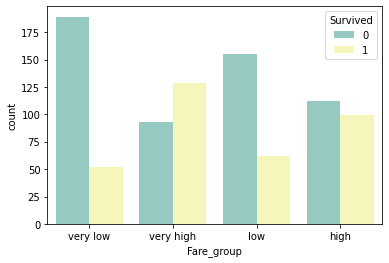

In [433]:
sns.countplot(x='Fare_group', data=train_df, hue='Survived', palette='Set3')

We see that the very high fare have highest survival rate(58%),
 the very low have the lowest survival rate (21%) 

It can be concluded that
- The higher the ticket fare, the higher your survival rate

## Impact of Class, Age and Fare for each gender

### Male and female survival per class?

In [434]:
survived_sex_class = train_df.groupby(['Sex','Pclass', 'Survived'])['Survived'].count().unstack()
survived_sex_class.columns = ['Not survived', 'Survived']
survived_sex_class

Not survived  Survived
Sex    Pclass                        
female 1                  3        91
       2                  6        70
       3                 72        72
male   1                 77        45
       2                 91        17
       3                300        47

### Male and female survival by Age?

In [435]:
survived_sex_age = train_df.groupby(['Sex','Age_group', 'Survived'])['Survived'].count().unstack()
survived_sex_age.columns = ['Not survived', 'Survived']
survived_sex_age.fillna(0)

Not survived  Survived
Sex    Age_group                        
female Adult              11.0      68.0
       Man                16.0      48.0
       Old                 0.0       2.0
       child              16.0      33.0
       teenager           38.0      82.0
male   Adult             108.0      33.0
       Man               111.0      26.0
       Old                12.0       1.0
       child              29.0      22.0
       teenager          208.0      27.0

### Male and female survival by Fare?

In [436]:
survived_sex_fare = train_df.groupby(['Sex','Fare_group', 'Survived'])['Survived'].count().unstack()
survived_sex_fare.columns = ['Not survived', 'Survived']
survived_sex_fare.fillna(0)

Not survived  Survived
Sex    Fare_group                        
female high                  25        64
       low                   25        41
       very high             16        95
       very low              15        33
male   high                  87        35
       low                  130        21
       very high             77        34
       very low             174        19

In [437]:
survived_sex_fare = train_df.groupby(['Sex','companions', 'Survived'])['Survived'].count().unstack()
survived_sex_fare.columns = ['Not survived', 'Survived']
survived_sex_fare.fillna(0)

Not survived  Survived
Sex    companions                        
female 0                   27.0      99.0
       1                   16.0      71.0
       2                   11.0      38.0
       3                    3.0      16.0
       4                    9.0       3.0
       5                    5.0       3.0
       6                    5.0       3.0
       7                    2.0       0.0
       10                   3.0       0.0
male   0                  347.0      64.0
       1                   56.0      18.0
       2                   32.0      21.0
       3                    5.0       5.0
       4                    3.0       0.0
       5                   14.0       0.0
       6                    3.0       1.0
       7                    4.0       0.0
       10                   4.0       0.0

- We see that female from 1st class have more chance to survive, then 2nd class then 3rd class
- There were 2 olds females both of them survive
- The higher the ticket fare, the higher your survival rate for females
- Females in all cases had more chance to survive
- Females with 0, 1 or 2 companions have a high chance to survive, it seems that males sacrificed themselves to let the females survive

# 5. Modeling

## 5.1 Prepare Data for modeling

In [438]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,companions,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,teenager,1,very low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Man,1,very high
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,teenager,0,very low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1,very high
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0,low


In [439]:
train_df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.059579
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
companions     0.016639
Name: Survived, dtype: float64

### Drop irrelevant features

In [440]:
train_df.drop(['Name', 'Ticket', 'PassengerId', 'companions'], axis = 1, inplace = True)

### convert categorical variables to dummies

In [441]:
hot_encoder1 = pd.get_dummies(train_df[['Sex', 'Embarked']])
train_df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
train_df = train_df.join(hot_encoder1)
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_group,Fare_group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,teenager,very low,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,Man,very high,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,teenager,very low,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,Adult,very high,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,Adult,low,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Adult,low,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,teenager,high,1,0,0,0,1
888,0,3,21.5,1,2,23.4500,teenager,high,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,teenager,high,0,1,1,0,0


In [442]:
hot_encoder1 = pd.get_dummies(train_df['Pclass'])
hot_encoder2 = pd.get_dummies(train_df['Age_group'])
hot_encoder3 = pd.get_dummies(train_df['Fare_group'])

train_df.drop(['Pclass', 'Age_group', 'Fare_group', 'Age', 'Fare'], axis = 1, inplace = True)

train_df = train_df.join(hot_encoder1)
train_df = train_df.join(hot_encoder2)
train_df = train_df.join(hot_encoder3)

train_df

,Survived,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,1,2,3,Adult,Man,Old,child,teenager,high,low,very high,very low
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
1,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
887,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0
888,0,1,2,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
889,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0


### To avoid Dummy variable trap

In [443]:
train_df.drop(['Sex_male', 'Embarked_Q', 2, 'Man', 'high'], axis = 1, inplace = True)
train_df.head()

,Survived,SibSp,Parch,Sex_female,Embarked_C,Embarked_S,1,3,Adult,Old,child,teenager,low,very high,very low
0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
3,1,1,0,1,0,1,1,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0


In [444]:
train_df.corr()['Survived']

Survived      1.000000
SibSp        -0.035322
Parch         0.081629
Sex_female    0.543351
Embarked_C    0.168240
Embarked_S   -0.149683
1             0.285904
3            -0.322308
Adult         0.088603
Old          -0.049466
child         0.121485
teenager     -0.128514
low          -0.114486
very high     0.233638
very low     -0.210437
Name: Survived, dtype: float64

In [445]:
train_df.columns = ['Survived',	'SibSp', 'Parch', 'Sex_female',	'Embarked_C', 'Embarked_S',	'1', '3', 'Adult', 'Old', 'child', 'teenager', 'low', 'very high', 'very low']

### Data Splitting

In [446]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [447]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = .2, random_state = 0)

## 5.2 Explore models

### 1. Logisitic Regression

In [448]:
# Fitting 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Accuracy
log_pred = log_reg.predict(X_valid)
log_accuracy = accuracy_score(y_valid, log_pred)
log_accuracy

0.8212290502793296

In [449]:
confusion_matrix(y_valid, log_pred)

array([[97, 13],
       [19, 50]], dtype=int64)

### 2. SVM

In [450]:
# Fitting
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

# Accuracy
svc_pred = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid, svc_pred)
svc_accuracy

0.7877094972067039

In [451]:
confusion_matrix(y_valid, svc_pred)

array([[92, 18],
       [20, 49]], dtype=int64)

### 3. Decision Tree

In [452]:
# Fitting
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)

# Accuracy
dtc_pred = dtc.predict(X_valid)
dtc_accuracy = accuracy_score(y_valid, dtc_pred)
dtc_accuracy

0.8156424581005587

### 4. KNN

In [453]:
# Fitting
knn = neighbors.KNeighborsClassifier(5, weights = 'uniform')
knn.fit(X, y)

# Accuracy
knn_pred = knn.predict(X_valid)
knn_accuracy = accuracy_score(y_valid, knn_pred)
knn_accuracy

C:\Users\hossa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8770949720670391

In [454]:
confusion_matrix(y_valid, knn_pred)

array([[103,   7],
       [ 15,  54]], dtype=int64)

### 5. Random Forest Tree

In [455]:
# Fitting
rfc = RandomForestClassifier(criterion='entropy', n_jobs=-1)
rfc.fit(X_train, y_train)

# Accuracy
rfc_pred = rfc.predict(X_valid)
rfc_accuracy = accuracy_score(y_valid, rfc_pred)
rfc_accuracy

0.8324022346368715

In [456]:
confusion_matrix(y_valid, rfc_pred)

array([[101,   9],
       [ 21,  48]], dtype=int64)

In [459]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'Random Forest' , 'Linear SVC', 'Decision Tree'],
    'Score': [ knn_accuracy, log_accuracy, rfc_accuracy, svc_accuracy, dtc_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,0.877095
2,Random Forest,0.832402
1,Logistic Regression,0.821229
4,Decision Tree,0.815642
3,Linear SVC,0.787709
